<a href="https://www.kaggle.com/code/mariamashraf163/olympic?scriptVersionId=124995399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
olympic = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
data = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv') 

In [3]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
olympic.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
data.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


<AxesSubplot:>

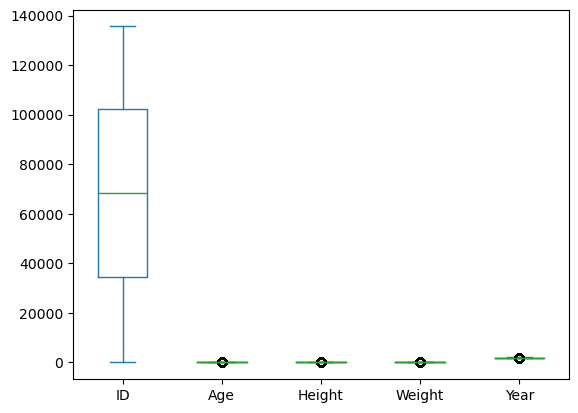

In [9]:
#Plot boxplot.
olympic.plot.box()

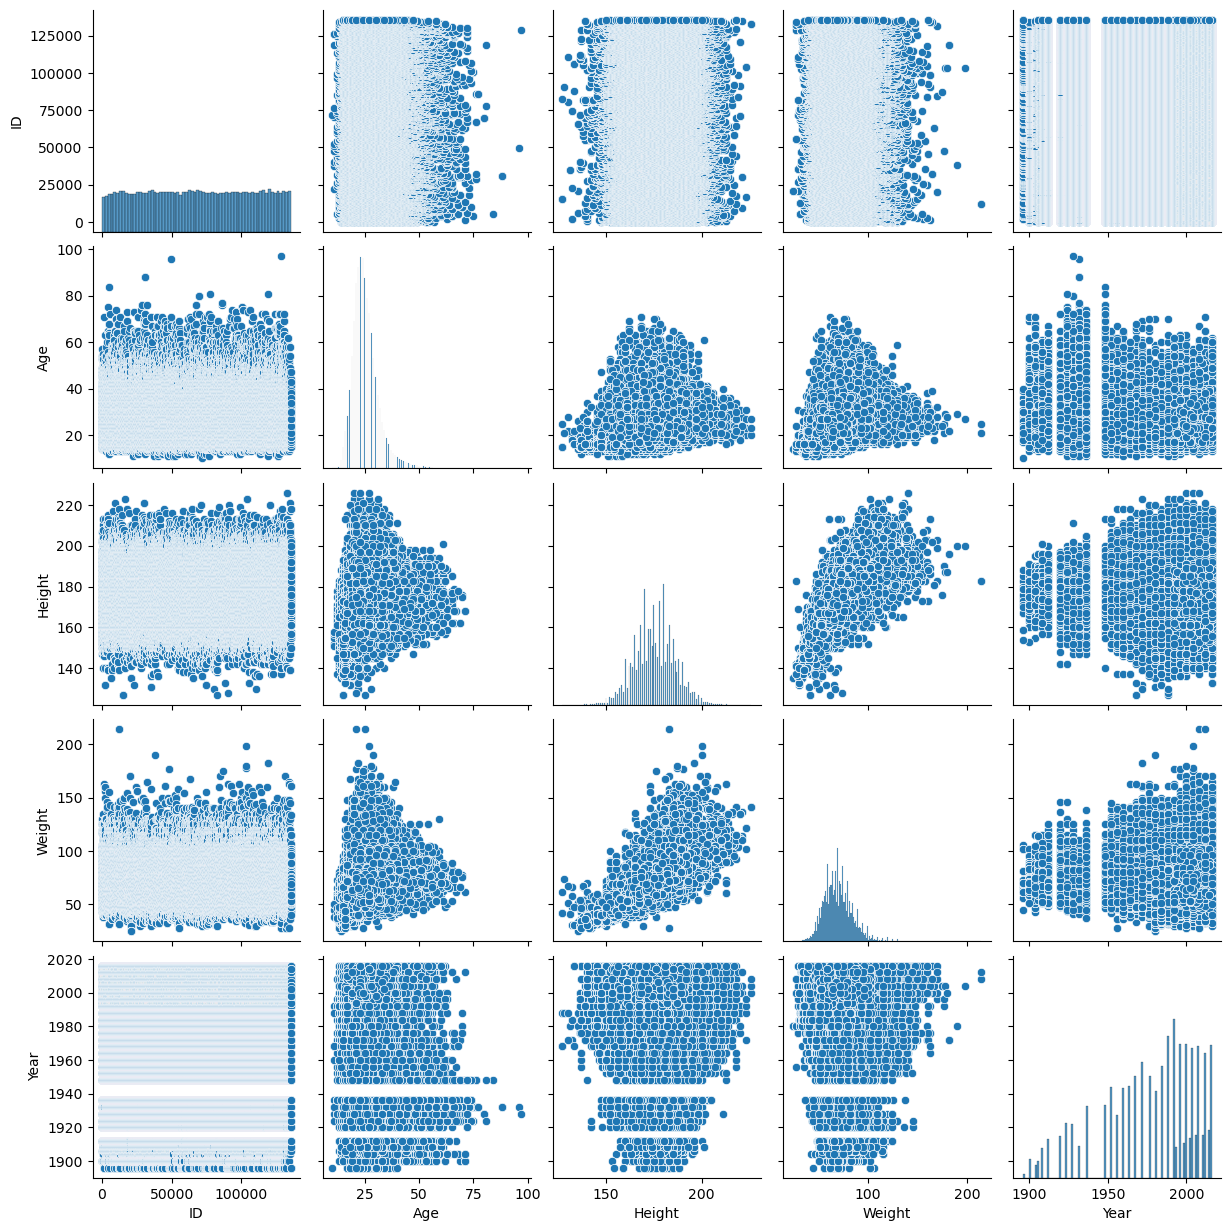

In [10]:
#Create pair-wise plots.
sns.pairplot(olympic)

In [11]:
#Merge and display dataframes.
df = pd.merge(left=olympic,right=data,on='NOC',how='left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
#Check and print duplicates.
if df.duplicated().any():
  print("There is s a duplicate values =",df.duplicated().sum())
else:
  print("There is not a dupblcated values ")

There is s a duplicate values = 1385


In [13]:
#Remove duplicates, check
df.drop_duplicates(inplace=True)
if df.duplicated().any():
  print("There is a duplicate values =", df.duplicated().sum())
else:
  print("There is not a dupblcated values ")

There is not a dupblcated values 


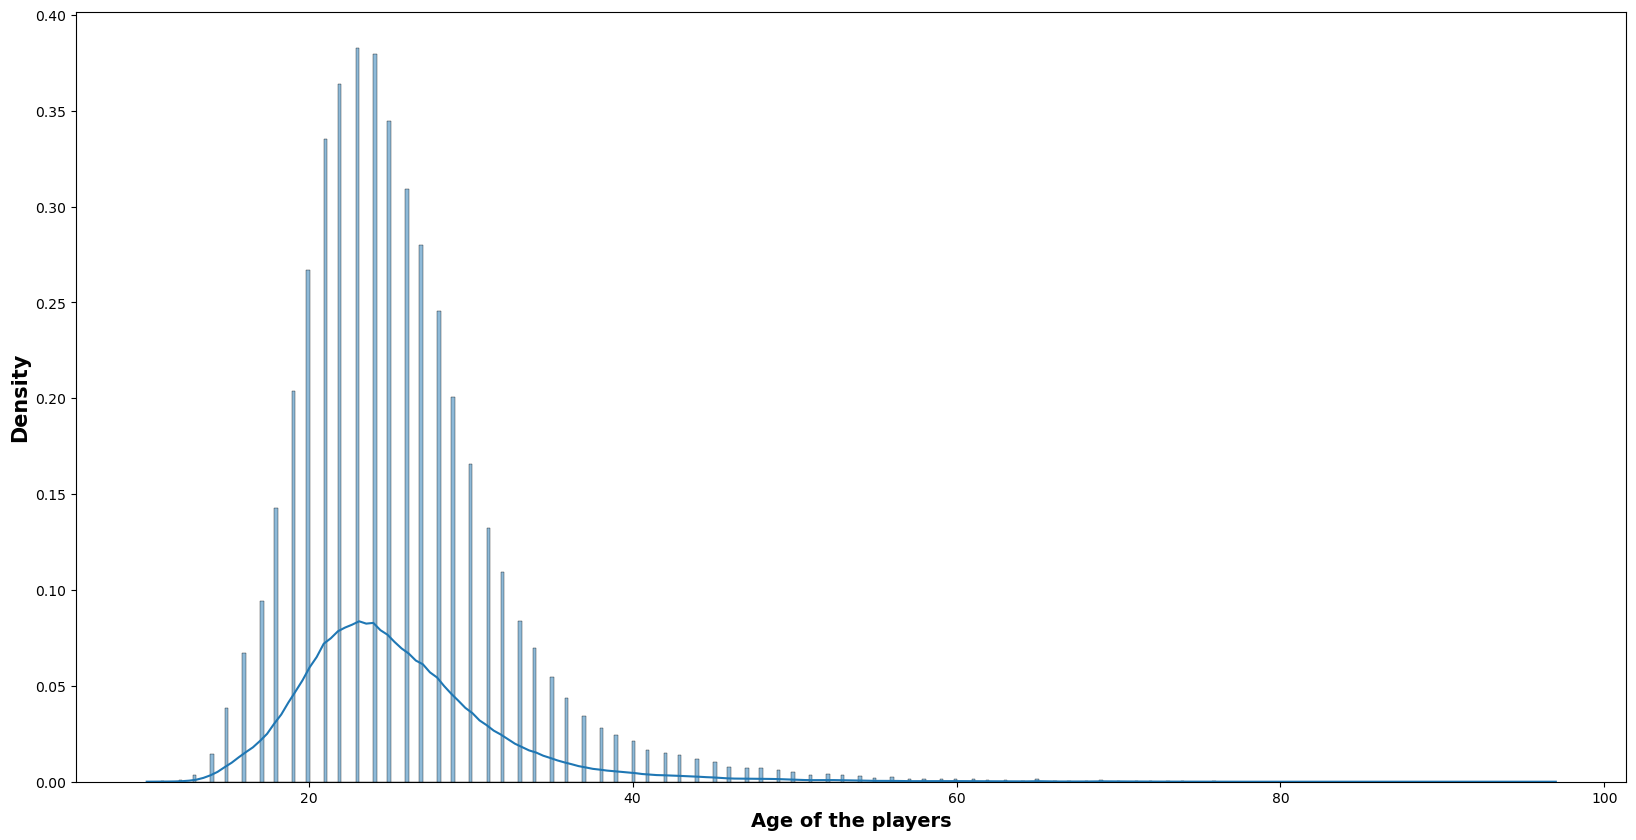

In [14]:
#The code plots age density distribution
plt.figure(figsize=(20, 10))
sns.histplot(data=olympic, x="Age", kde=True, stat="density")
plt.xlabel("Age of the players", fontsize=14, weight="semibold")
plt.ylabel("Density", fontsize=15, weight="semibold")
plt.show()

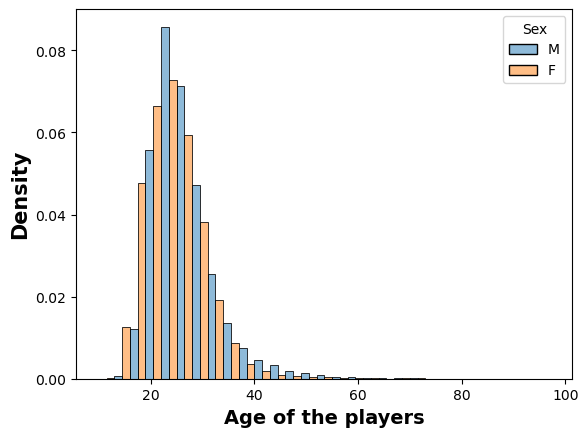

In [15]:
#The code plots age distribution by sex.
sns.histplot(data=olympic, x="Age", hue="Sex",
             multiple="dodge",
             alpha=0.5, binwidth=3,
             stat="density", common_norm=False)
plt.xlabel("Age of the players", fontsize=14, weight="semibold")
plt.ylabel("Density", fontsize=15, weight="semibold")
plt.show()

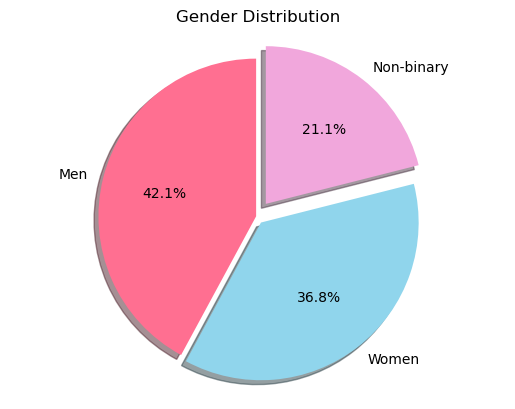

In [16]:
#visualization gender distribution using a pie chart.

# Define the data
sexes = ['Men', 'Women', 'Non-binary']
counts = [4000, 3500, 2000]
explode = (0, 0.05, 0.1)
colors = ['#FF6F91', '#90D5EC', '#F1A7DC']

# Create a new figure
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(x=counts, labels=sexes, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True, colors=colors)

# Set the title
ax.set_title("Gender Distribution")

# Set the axis to be equal
plt.axis('equal')

# Show the plot
plt.show()

In [17]:
#The code filters medalists' data.
med_players = olympic[olympic["Medal"].notna()]
med_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [18]:
gold_count = olympic["Medal"][olympic["Medal"] == "Gold"].value_counts()
silver_count = olympic['Medal'][olympic["Medal"] == "Silver"].value_counts()
bronze_count = olympic["Medal"][olympic["Medal"] == "Bronze"].value_counts()
medals = {'gold': gold_count, 'silver': silver_count, 'bronze': bronze_count}
medals

{'gold': Gold    13372
 Name: Medal, dtype: int64,
 'silver': Silver    13116
 Name: Medal, dtype: int64,
 'bronze': Bronze    13295
 Name: Medal, dtype: int64}

Text(0.5, 1.0, 'Silver Medals by Sex')

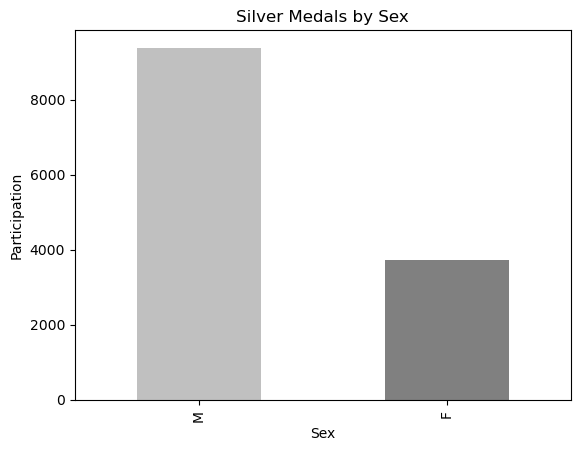

In [19]:
#Plot silver medals by sex distribution.
olympic['Sex'][olympic["Medal"] == "Silver"].value_counts().plot(kind='bar', color=['#C0C0C0','#808080'])
plt.xlabel('Sex')
plt.ylabel('Participation')
plt.title('Silver Medals by Sex')

Text(0.5, 1.0, 'Bronze Medals by Sex')

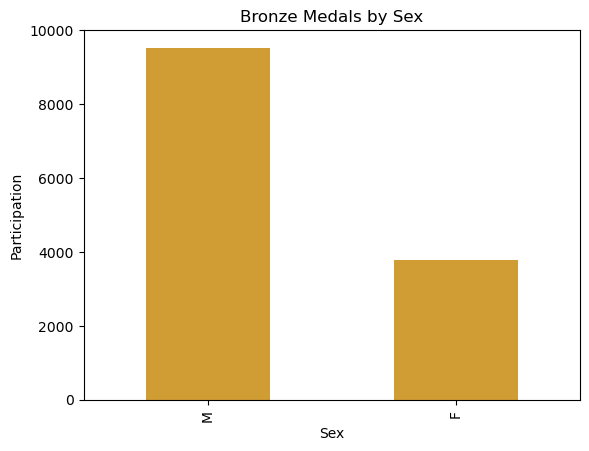

In [20]:
#Plot bronze medals by sex distribution.
olympic['Sex'][olympic["Medal"] == "Bronze"].value_counts().plot(kind='bar', color='#d09d35')
plt.xlabel('Sex')
plt.ylabel('Participation')
plt.title('Bronze Medals by Sex')

<AxesSubplot:title={'center':'gold medals by sex'}, xlabel='sex', ylabel='participation'>

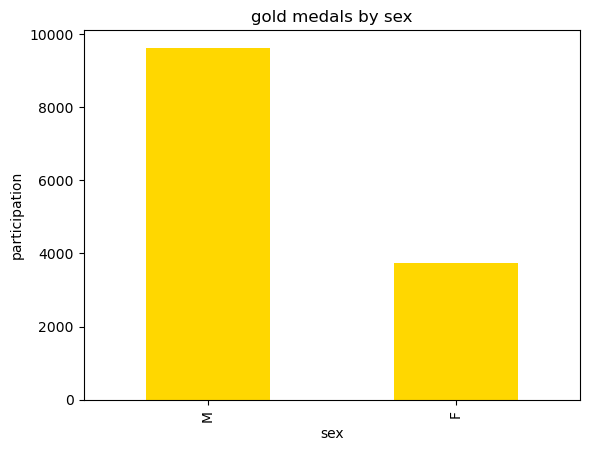

In [21]:
#The code plots gold medals by sex
plt.title('gold medals by sex')
plt.xlabel('sex')
plt.ylabel('participation')
olympic[olympic["Medal"] == "Gold"]["Sex"].value_counts().plot(kind='bar', color='gold')